In [11]:
import numpy as np
import sklearn
import statistics as stat
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

np.random.seed(11)  

# conjunto de datos de las viviendas en California
# .data, .target, .feature_names, .DESCR
cali = sklearn.datasets.fetch_california_housing()

# descripcion del conjunto
print(cali.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1) Clustering

Usa el conjunto de datos de las viviendas en California que puedes descargar con la función: sklearn.datasets.fetch_california_housing

En el conjunto de datos cada fila es un “bloque” que es la mínima unidad geográfica para la cual el censo estadounidense hace públicos los datos (suele tener desde varios cientos a unos pocos miles de habitantes). 

El objetivo es realizar agrupamientos de los bloques que presenten características similares. No incluyas la latitud y longitud para no agrupar los bloques por su cercanía geográfica, sino por sus características. Tampoco incluyas la variable target del dataset que es la mediana del precio de las viviendas en el bloque en cuestión. 

1) Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, su distribución y su correlación
   
    - Nombre del conjunto de datos
        California Housing Dataset
        
    - Breve descripción del problema que describe
        Representar bloques de zonas habitables en California de 1990. Un bloque tiene entre 600 y 3.000 personas.

    - Nombre y tipo de las variables
        Proporciona los siguientes datos :
            MedInc    
            HouseAge  
            AveRooms  
            AveBedrms 
            Population
            AveOccup  
            Latitude  
            Longitude 
         
        todas las variables son de tipo numpy.float64
        
    - Estadísticos descriptivos de cada variable
        MedInc     		mediana de los ingresos del bloque
        HouseAge  		mediana de las edades de las casas del bloque
        AveRooms  		número medio de habitaciones
        AveBedrms 		número medio de dormitorios
        Population 		población del bloque
        AveOccup   		media de residentes por vivienda
        Latitude   		latitud del bloque
        Longitude		longitud del bloque
        
       
        


In [3]:
# Distribución de datos 
for j in range(0, 8):
    X = []
    for i in range(0, len(cali.data)):
        X.append(cali.data[i][j])
    
    print(cali.feature_names[j], "(", j, ")")
    print("\tMedia: ", stat.mean(X))
    print("\tDeviación típica: ", stat.stdev(X))
    print("\tVarianza: ", stat.variance(X))
    print("\tMediana: ", stat.median(X))
    print("\tMáximo: ", max(X))    
    print("\tMínimo: ", min(X), "\n")

MedInc ( 0 )
	Media:  3.8706710029069766
	Deviación típica:  1.8998217179452688
	Varianza:  3.6093225599765124
	Mediana:  3.5347999999999997
	Máximo:  15.0001
	Mínimo:  0.4999 

HouseAge ( 1 )
	Media:  28.639486434108527
	Deviación típica:  12.585557612111648
	Varianza:  158.39626040778145
	Mediana:  29.0
	Máximo:  52.0
	Mínimo:  1.0 

AveRooms ( 2 )
	Media:  5.428999742190376
	Deviación típica:  2.4741731394243187
	Varianza:  6.12153272384879
	Mediana:  5.229128787878788
	Máximo:  141.9090909090909
	Mínimo:  0.8461538461538461 

AveBedrms ( 3 )
	Media:  1.096675149606208
	Deviación típica:  0.473910856795466
	Varianza:  0.22459150018861268
	Mediana:  1.048780487804878
	Máximo:  34.06666666666667
	Mínimo:  0.3333333333333333 

Population ( 4 )
	Media:  1425.4767441860465
	Deviación típica:  1132.462121765341
	Varianza:  1282470.4572332578
	Mediana:  1166.0
	Máximo:  35682.0
	Mínimo:  3.0 

AveOccup ( 5 )
	Media:  3.0706551594363742
	Deviación típica:  10.386049562213618
	Varianza:  107

In [4]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
    plt.show()

# Función para extraer columnas de una matriz: recibe una matriz y dos indices
# Devuelve una matriz con las columnas de los indices
def column(matrix, i, j):
    return np.array([np.array([row[i], row[j]]) for row in matrix])

2) Considera si debes re‐escalar las variables antes y el tipo de escalado que usas. Razona tu elección. 

Tras comparar los plots con o sin escalar los datos, podemos observar que si no escalamos las variables los clusters quedan separados por lineas completamente horizontales; esto es porque una de las variables toma valores mucho mas grandes que la otra y por tanto la variable con rango mas elevado tiene mas peso a la hora de separar los clusters. En cambio si escalamos los datos y repetimos el proceso, los clusters resultantes quedan separados no solo por lineas horizontales sino tambien diagonales

Vamos a elegir escalar los datos para evitar las lineas horizontales y que ambas variables tengan rangos similares.

SIN ESCALADO:


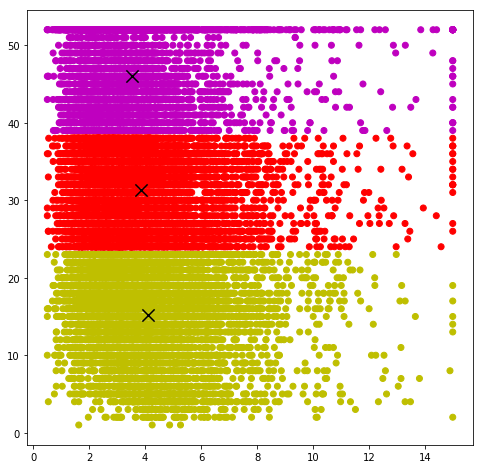

0.5317915014129825

CON ESCALADO:


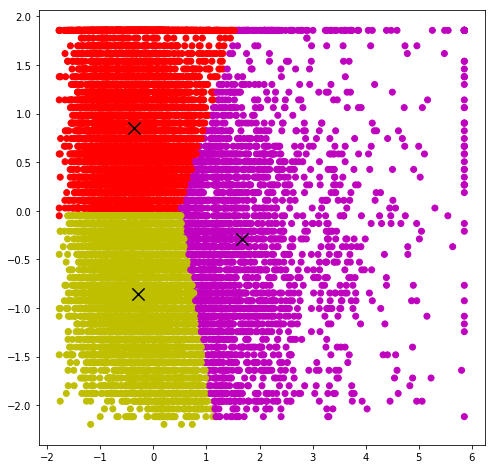

0.39369430009464473


In [5]:
# Copiamos a X las columnas 4 y 5 (Población y Ocupación Media)
X = column(cali.data, 0, 1)

#Declaramos un array para guardar los valores de silhouette y poder compararlos despues
silhouette = np.zeros(2)

# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3)
km.fit(X)

#Ploteamos X sin escalar para compararlo despues con X escalado
print("SIN ESCALADO:")
plot_clusters(X, km.labels_, km.cluster_centers_)

silhouette[0] = silhouette_score(X, km.labels_) 
print(silhouette_score(X, km.labels_))
print()
#Ahora re-escalamos X y ploteamos de nuevo
scaler = StandardScaler()
XSCALED = scaler.fit_transform(X)

#Redefinimos k-means para plotearlo escalado
km = KMeans(init='random', n_clusters=3)
km.fit(XSCALED)

print("CON ESCALADO:")
plot_clusters(XSCALED, km.labels_, km.cluster_centers_)
   
silhouette[1] = silhouette_score(XSCALED, km.labels_) 
print(silhouette_score(XSCALED, km.labels_))

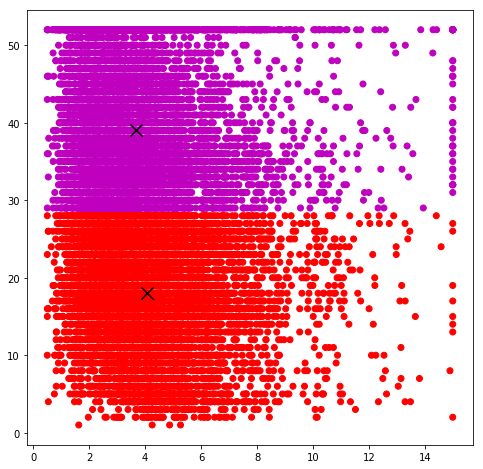

0.5735207485465588


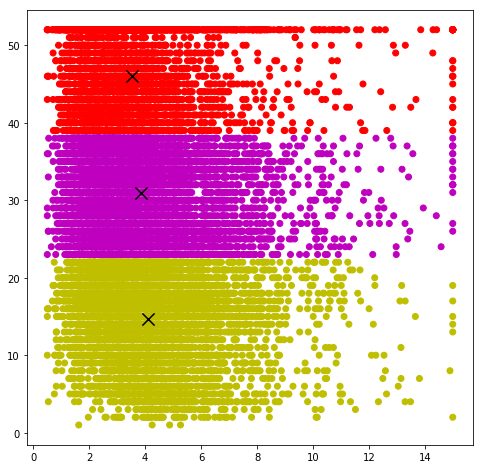

0.5302085222645893


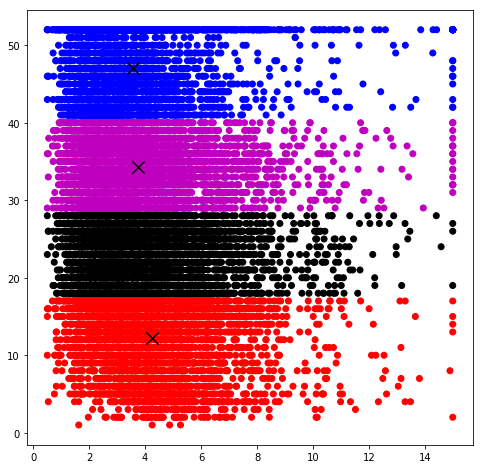

0.49124078595619464


In [6]:
#Cinco plots que representan los datos SIN ESCALAR y con distinto numero de clusters y sus respectivos valores de silhouette
K_MAX = 5
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k)
    km.fit(X)
    plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silhouette[k-2] = silhouette_score(X, km.labels_) 
    print(silhouette_score(X, km.labels_))

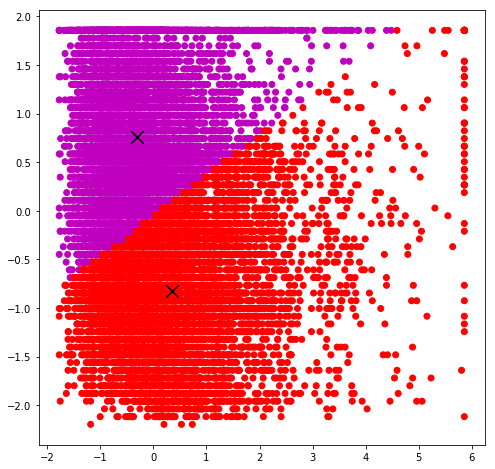

0.36788982693449485


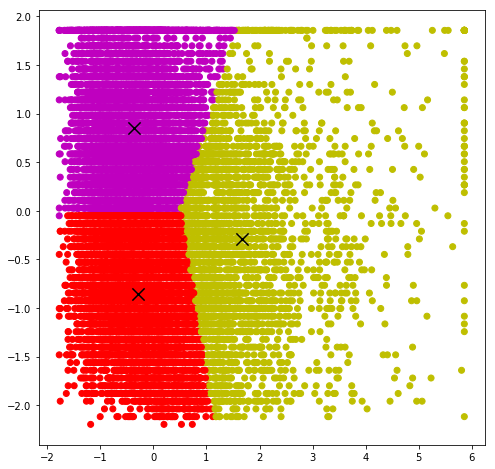

0.3936750952562369


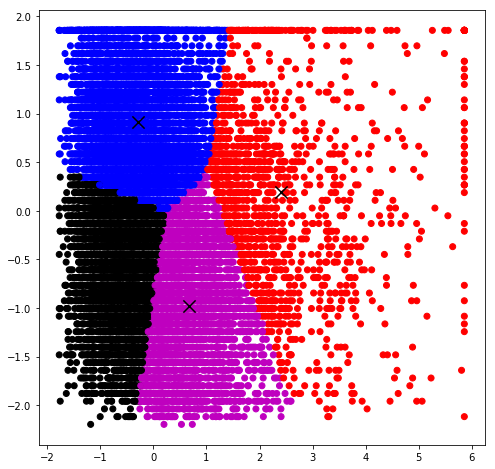

0.35796360013407413


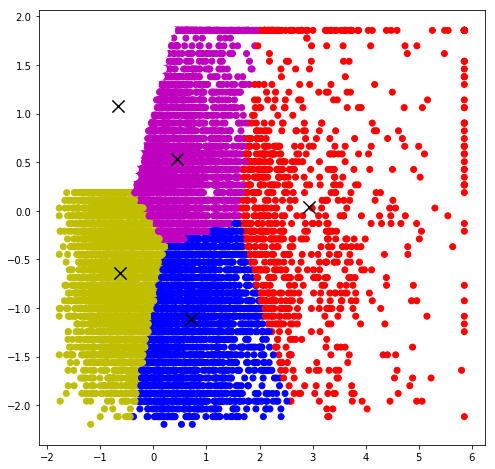

0.35488826090822734


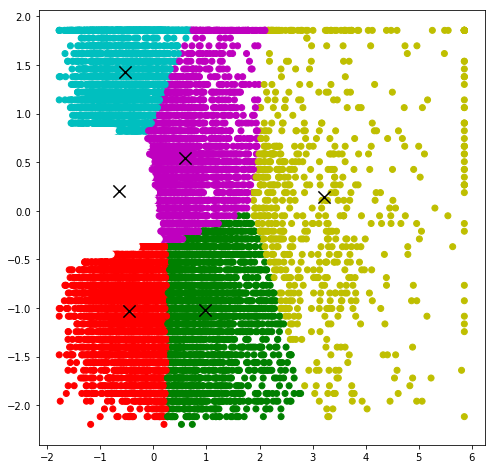

0.34786539249979503


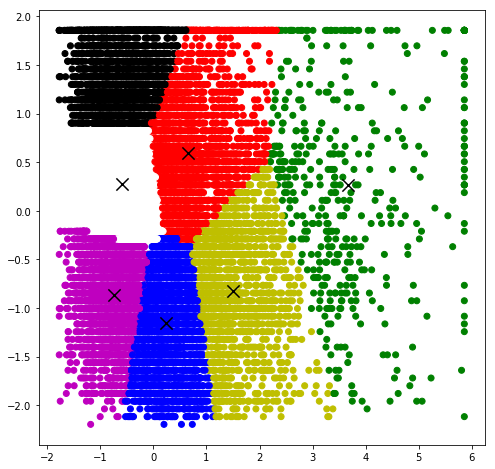

0.3328340602326946


In [7]:
#Cinco plots que representan los datos ESCALADOS con distinto numero de clusters y sus respectivos valores de silhouette
K_MAX = 8
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k)
    km.fit(XSCALED)
    plot_clusters(XSCALED, km.labels_, km.cluster_centers_)
    
    silhouette[k-2] = silhouette_score(XSCALED, km.labels_) 
    print(silhouette_score(XSCALED, km.labels_))

3) Aplica el algoritmo de clustering k‐medias y determina el número de clusters que consideras adecuado para el conjunto de datos, justificando tu elección.
    
En este ejemplo estamos relacionando la variable MedInc(Salario medio del bloque) con la variable HouseAge(edad de la casa en años), teniendo en cuenta los graficos anteriores podemos observar que una vez escalamos los datos, utilizando 3 clusters obtenemos el mayor indice de Silhouette 0.39, por tanto 3 clusters es la mejor opcion.

SIN ESCALADO:


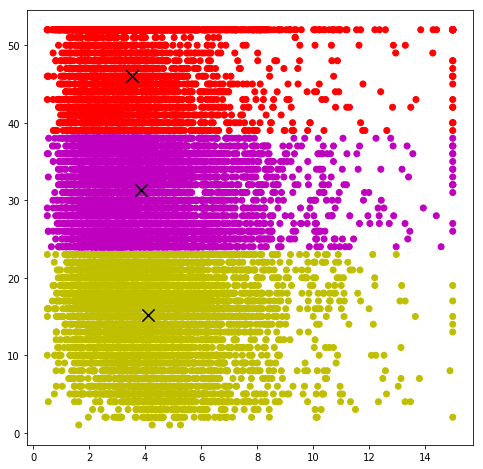

In [9]:
km = KMeans(init='random', n_clusters=3)
km.fit(X)

#Ploteamos X sin escalar
print("SIN ESCALADO:")
plot_clusters(X, km.labels_, km.cluster_centers_)

4) Trata de averiguar qué representa cada uno de los clusters que has obtenido. Si en el apartado anterior has obtenido más de 5 clusters, basta con que comentes los dos más numerosos y los dos menos numerosos. ¿Qué valores toman las variables en cada cluster? Puedes usar estadísticos descriptivos Te recomendamos que uses las variables en su escala original y no en la transformada (ya que se interpretará mucho peor).

Utilizando 3 clusters, observando los datos sin escalarlos podemos ver que los clusters estan separados por dos lineas horizontales, el cluster rojo compondria las casas mas antiguas, el cluster morado las casas de mediana edad y por ultimo el cluster amarillo seria las casas modernas. Ahora podemos observar como se distribuyen los dueños de casas dentro de cada cluster en funcion de su salario. En primer lugar se observa un claro declive en el numero de datos a medida que aumenta el salario, ya que la gran mayoria estan distribuidos cerca de la media del MedInc(3.8706710029069766) que es bastante baja. En contraste apartir de MedInc 8 se observa un declive en la densidad de la distribucion de los datos, lo cual representa que hay menos gente con sueldos altos que con sueldos bajos indistintamente de la edad de la casa. Tambien podemos observar que en el cluster rojo(que representa las casas de entre 40 y 50 años de edad) el declive en densidad de la distribucion de los datos se produce en un salario disinguiblemente mas bajo que en los otros dos. Esto quiere decir que si tienes una casa vieja es mas pobable que tengas un salario cercano a la media.

5) Pinta los clusters en un gráfico de dispersión en función de dos de las variables de entrada que consideres interesantes. ¿Ves que considerando solamente esas dos variables se diferencien bien algunos de los clusters? ¿Cuáles? Por el contrario, ¿cuáles se confuden más?  Te recomendamos que en este caso uses las variables tal y como las usaste para hacer el clustering (es decir, re‐escaladas, si las re‐escalastes) para así diferenciar los clusters mejor 

Tras plotear los datos con el algoritmo aglomerativo podemos observar que los clusters se diferencian entre si por su tamaño. Ademas el cluster amarillo se distingue de los otros dos por tener el rango mas amplio y una distribucion menos densa de sus datos. Si observamos el grafico utilizando k-means el cluster amarillo y el cluster morado son mucho mas parecidos entre si en cuanto a tamaño; el amarillo en cambio abarca mas espacio y tiene menor densidad en la distibucion de los datos.
A su vez, los datos estan distribuidos de una forma tan densa que no queda claro donde poner las fronteras para distinguir los clusters.

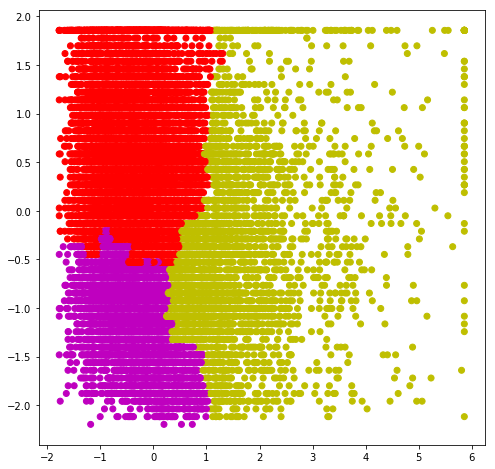

0.3603531443941137


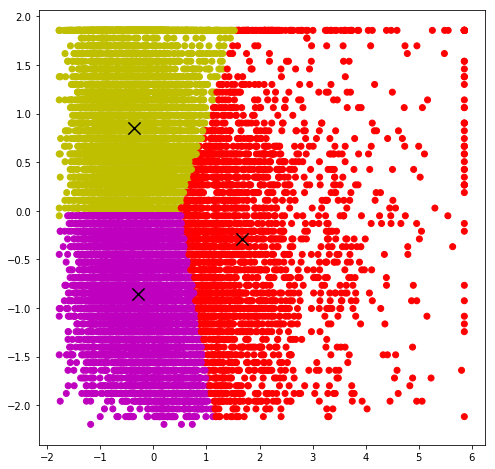

0.39369430009464473


In [8]:
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ag.fit(XSCALED)
plot_clusters(XSCALED, ag.labels_)

print("Usando un algoritmo jerarquico aglomerativo")
silhouette[0] = silhouette_score(XSCALED, ag.labels_) 
print(silhouette_score(XSCALED, ag.labels_))

km = KMeans(init='random', n_clusters=3)
km.fit(XSCALED)
plot_clusters(XSCALED, km.labels_, km.cluster_centers_)
    
print("Usando el algoritmo k-means")
silhouette[1] = silhouette_score(XSCALED, km.labels_) 
print(silhouette_score(XSCALED, km.labels_))